## IMPORING LIBRARIES

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOADING MODEL

In [7]:
cnn=tf.keras.models.load_model('trained_model.keras')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,488,906 (43.83 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,744,454 (21.91 MB)

## VISUALISING SINGLE IMAGE OF TEST SET

([], [])

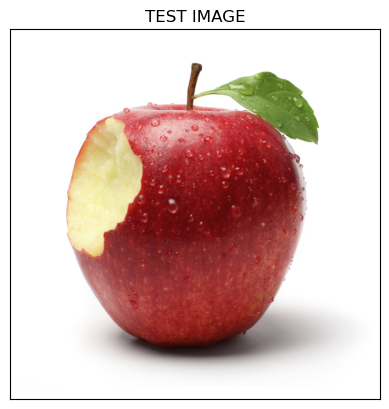

In [57]:
import cv2
image_path1='test/apple/Image_10.jpg'

# READING IMAGE
img1=cv2.imread(image_path1)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) # CONVERT BGR TO RGB

# DISPLAYING IMAGE
plt.imshow(img1)
plt.title('TEST IMAGE')
plt.xticks([])
plt.yticks([])

([], [])

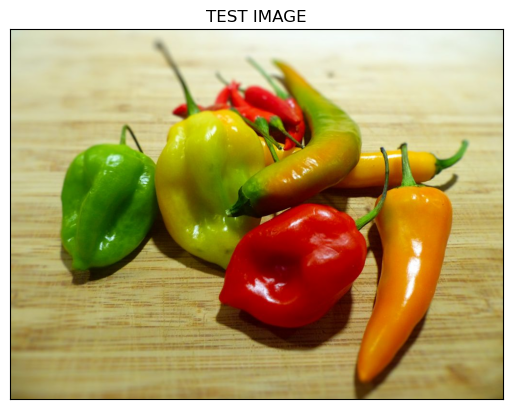

In [85]:
import cv2
image_path2='test/chilli pepper/Image_3.jpg'

# READING IMAGE
img2=cv2.imread(image_path2)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB) # CONVERT BGR TO RGB

# DISPLAYING IMAGE
plt.imshow(img2)
plt.title('TEST IMAGE')
plt.xticks([])
plt.yticks([])

## TESTING MODEL

In [71]:
image1=tf.keras.preprocessing.image.load_img(image_path1,target_size=(64,64))
input_arr1=tf.keras.preprocessing.image.img_to_array(image1)
input_arr1=np.array([input_arr1]) # CONVERT SINGLE IMAGE TO BATCH
print(input_arr1)
print(input_arr1.shape)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [254. 254. 254.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]
(1, 64, 64, 3)


In [73]:
prediction1=cnn.predict(input_arr1)
prediction1,prediction1.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


(array([[1.0000000e+00, 2.5437329e-21, 4.8555588e-22, 2.5115062e-16,
         8.4940023e-19, 1.1842291e-19, 4.8704118e-13, 1.6773052e-16,
         5.9186542e-14, 9.4057028e-18, 5.5581562e-24, 5.9194105e-14,
         3.9293032e-14, 1.8298883e-24, 8.4357868e-14, 7.4269685e-18,
         1.7775903e-18, 3.9081247e-12, 1.3786916e-18, 9.4557898e-16,
         7.8068201e-20, 5.1033855e-18, 4.0480653e-15, 1.8236458e-15,
         2.6962426e-23, 7.9846080e-13, 3.6483945e-14, 1.3268684e-15,
         1.9583392e-14, 3.0880389e-16, 6.8391337e-22, 4.5912140e-20,
         8.2000810e-17, 3.1892241e-13, 1.6425045e-10, 9.8427809e-17]],
       dtype=float32),
 (1, 36))

In [75]:
result_index1=np.argmax(prediction1)
result_index1

0

In [77]:
class_name=['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

'apple'

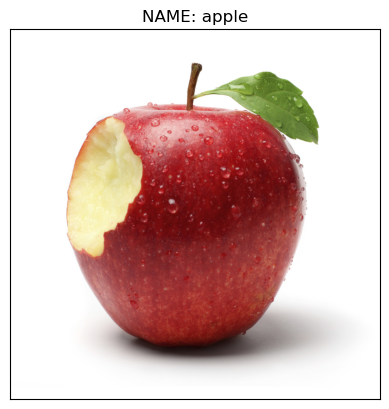

In [79]:
model_prediction1=class_name[result_index1]
plt.imshow(img1)
plt.title(f"NAME: {model_prediction1}")
plt.xticks([])
plt.yticks([])
model_prediction1

In [87]:
image2=tf.keras.preprocessing.image.load_img(image_path2,target_size=(64,64))
input_arr2=tf.keras.preprocessing.image.img_to_array(image2)
input_arr2=np.array([input_arr2]) # CONVERT SINGLE IMAGE TO BATCH
print(input_arr2)
print(input_arr2.shape)

[[[[206. 220. 197.]
   [211. 220. 193.]
   [216. 221. 191.]
   ...
   [226. 236. 225.]
   [222. 233. 219.]
   [219. 227. 212.]]

  [[207. 216. 189.]
   [213. 218. 188.]
   [215. 220. 188.]
   ...
   [224. 236. 222.]
   [221. 234. 217.]
   [221. 230. 211.]]

  [[206. 211. 181.]
   [211. 217. 183.]
   [213. 218. 186.]
   ...
   [228. 235. 219.]
   [225. 232. 214.]
   [220. 229. 210.]]

  ...

  [[144. 136.  74.]
   [150. 141.  76.]
   [157. 146.  82.]
   ...
   [155. 136.  68.]
   [147. 132.  65.]
   [141. 125.  63.]]

  [[138. 129.  74.]
   [144. 134.  75.]
   [150. 144.  82.]
   ...
   [147. 128.  60.]
   [144. 125.  56.]
   [138. 123.  56.]]

  [[124. 112.  52.]
   [131. 116.  51.]
   [140. 125.  60.]
   ...
   [151. 134.  65.]
   [140. 125.  60.]
   [127. 112.  47.]]]]
(1, 64, 64, 3)


In [89]:
prediction2=cnn.predict(input_arr2)
prediction2,prediction2.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(array([[7.2686224e-10, 4.1245943e-18, 1.5896987e-08, 6.9878754e-13,
         1.4505307e-14, 9.2741320e-13, 5.1493901e-14, 8.0767505e-14,
         9.9999988e-01, 1.0206927e-14, 4.2275441e-12, 2.2189770e-08,
         6.6362057e-14, 2.8032746e-15, 4.2050177e-09, 1.0590473e-10,
         3.9488692e-13, 2.3574060e-17, 3.0592120e-13, 3.7014132e-17,
         6.5315457e-12, 3.4803637e-19, 2.8076201e-11, 2.1410393e-15,
         3.3079287e-17, 3.7746794e-08, 3.1031648e-09, 2.1490900e-16,
         2.2259729e-14, 9.6913328e-16, 2.2619493e-11, 1.6826306e-16,
         2.1475258e-15, 2.2065118e-10, 1.4071195e-08, 8.5064464e-13]],
       dtype=float32),
 (1, 36))

In [91]:
result_index2=np.argmax(prediction2)
result_index2

8

'chilli pepper'

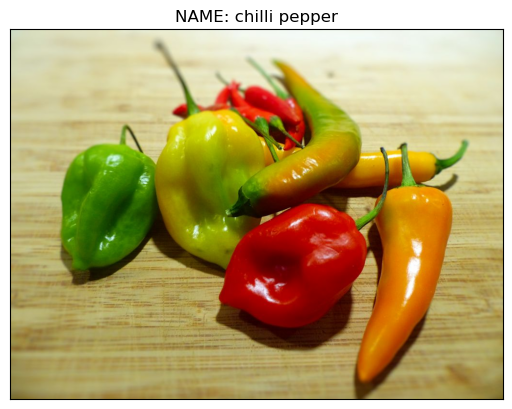

In [93]:
model_prediction2=class_name[result_index2]
plt.imshow(img2)
plt.title(f"NAME: {model_prediction2}")
plt.xticks([])
plt.yticks([])
model_prediction2